In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
import pathlib

data_dir = pathlib.Path("c:/Users/monic/Desktop/AT_Project/Photos")

In [8]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

22186


In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AttributeError: module 'tensorflow_core.keras.preprocessing' has no attribute 'image_dataset_from_directory'

In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 22186 files belonging to 22 classes.
Using 4437 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['barred_thicklip', 'black-and-gold_chromis', 'black_saddled_toby', 'blackbar_devil', 'brown_tang', 'chevron_butterflyfish', "clark's_anemonefish", 'damselfish', 'hemigymnus_melapterus', 'indo-pacific_sergeant', 'lemon_damsel', 'lutjanus_fulvus', 'moorish_idol', 'myripristis_kuntee', 'neoniphon_sammara', 'orange-lined_triggerfish', 'oval_butterflyfish', 'parrot_fish', 'pempheris_vanicolensis', 'pinspotted_spinefoot', 'stout_chromis', 'two-lined_monocle_bream']


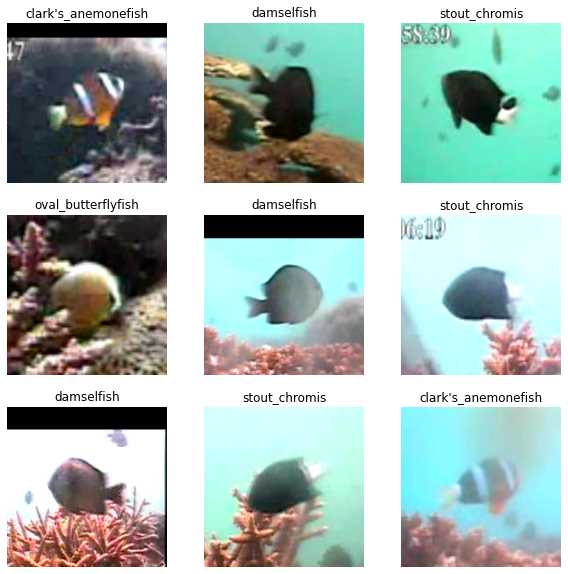

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [44]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [45]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [46]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9752887


In [51]:
num_classes = 22

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 22, 22, 128)      

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
555/555 [==============================] - 464s 835ms/step - loss: 0.9238 - accuracy: 0.7438 - val_loss: 0.1855 - val_accuracy: 0.9464
Epoch 2/50
555/555 [==============================] - 458s 825ms/step - loss: 0.1669 - accuracy: 0.9513 - val_loss: 0.1283 - val_accuracy: 0.9669
Epoch 3/50
555/555 [==============================] - 451s 813ms/step - loss: 0.0882 - accuracy: 0.9728 - val_loss: 0.1469 - val_accuracy: 0.9619
Epoch 4/50
555/555 [==============================] - 455s 821ms/step - loss: 0.0533 - accuracy: 0.9836 - val_loss: 0.1577 - val_accuracy: 0.9610
Epoch 5/50
555/555 [==============================] - 429s 773ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.1577 - val_accuracy: 0.9624
Epoch 6/50
555/555 [==============================] - 862s 2s/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.1789 - val_accuracy: 0.9633
Epoch 7/50
555/555 [==============================] - 458s 826ms/step - loss: 0.0218 - accuracy: 0.9924 - val_loss: 0.1703 - va

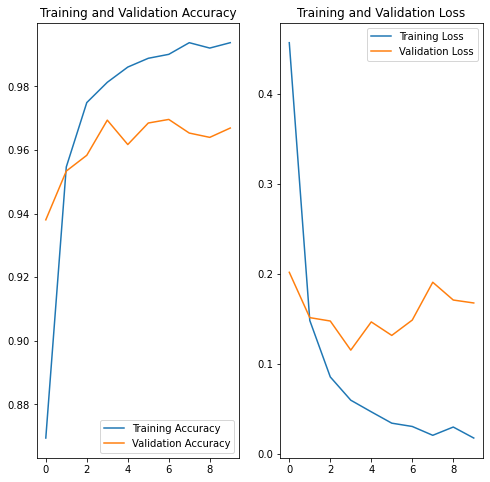

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
test_path = pathlib.Path("c:/Users/kelly/Desktop/AT_Project/Test/thing.png")

img_height = 180
img_width = 180

img = keras.preprocessing.image.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to indo-pacific_sergeant with a 6.49 percent confidence.
